# Regression

In [50]:
import pandas as pd
import numpy as np

## Simulating Data for Simple Linear Regression

To produce data suitable for simple linear regression modeling, we need to set up a probability distribution where the response variable $Y$ depends on a linear function of some variable $X$.

Perhaps the simplest way of doing this is to consider $Y$ as being generated by a normal distribution where $\mu$ is a linear function of $X$, and $\sigma$ is constant.

In this exaple we will generate a random linear function, a random $\sigma$, sample $X$ from a uniform distribution, then sample $Y$ from $N(f(X), \sigma)$. We'll plot a few realizations of this process to see the effect of the various parameters.

In [51]:
def sim_scatterplot(slope_range, intercept_range, explanatory_range, sigma_range, n):
    slope = np.random.uniform(-slope_range, slope_range)
    intercept = np.random.uniform(-intercept_range, intercept_range)
    
    X = np.random.uniform(-explanatory_range, explanatory_range, size=n)
    
    sigma = np.random.uniform(0, sigma_range)
    
    Y = np.random.normal(slope * X + intercept, sigma)
    
    df = pd.DataFrame({'Y': Y, 'X': X})
    
    df.plot.scatter(x='X', y='Y', title=f'Intercept: {intercept:.2f} \n Slope: {slope:.2f} \n Sigma: {sigma:.2f}', figsize=(20,10))

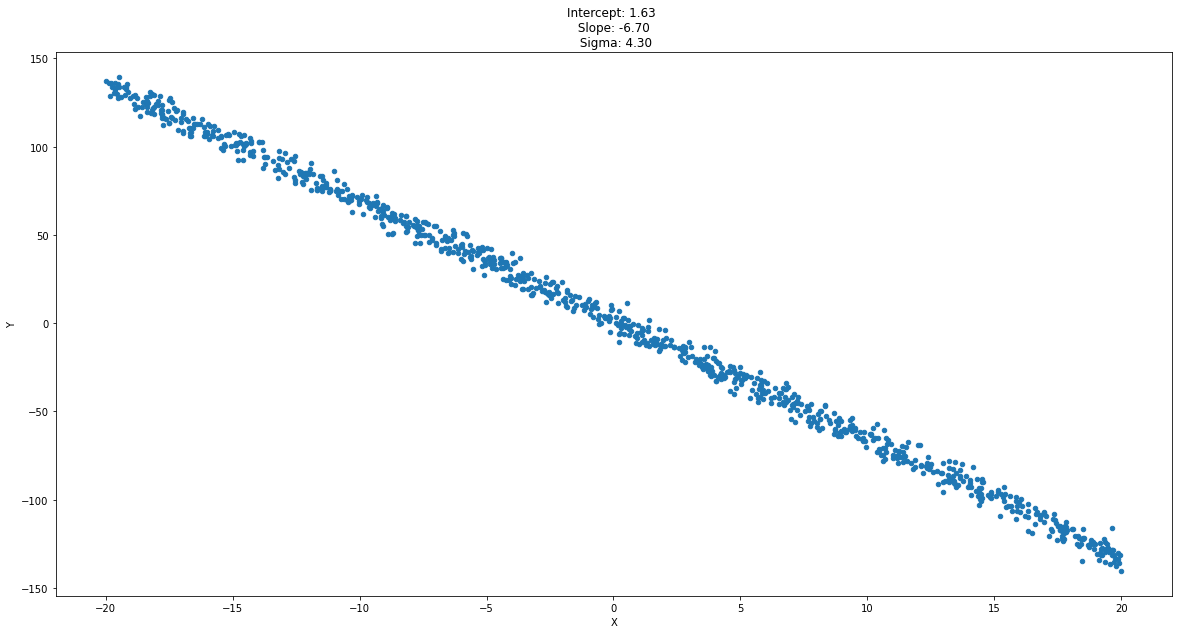

In [52]:
sim_scatterplot(10, 5, 20, 5, 1000)

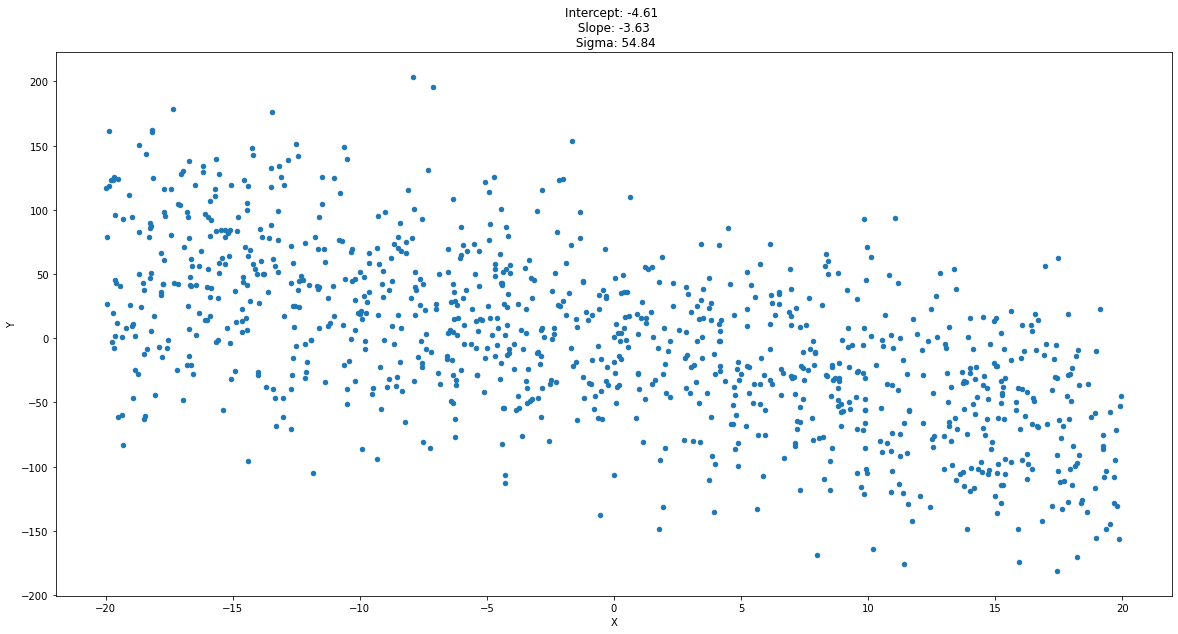

In [53]:
sim_scatterplot(10, 5, 20, 100, 1000)

## Recovering the Intercept and Slope of Simulated Data

Here we explore how well simple linear regression can recover the parameters of the linear function embedded in the mean, and how the variance of the generating distribution affects this.

In [54]:
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [55]:
def recover_params(slope_range, intercept_range, explanatory_range, sigma_range, n):
    slope = np.random.uniform(-slope_range, slope_range)
    intercept = np.random.uniform(-intercept_range, intercept_range)
    
    X = np.sort(np.random.uniform(-explanatory_range, explanatory_range, size=n))
    
    sigma = np.random.uniform(0, sigma_range)
    
    Y = np.random.normal(slope * X + intercept, sigma)
    
    b_0, b_1 = polyfit(X, Y, 1)
    
    plt.plot(X, Y, '.')
    plt.plot(X, b_0 + b_1 * X, '-')
    plt.title(f'Actual slope: {slope:.3f} \n Estimated slope: {b_1:.3f} \n Actual intercept: {intercept:.3f} \n Estimated intercept: {b_0:.3f} \n Sigma: {sigma:.2f}')
    plt.show()

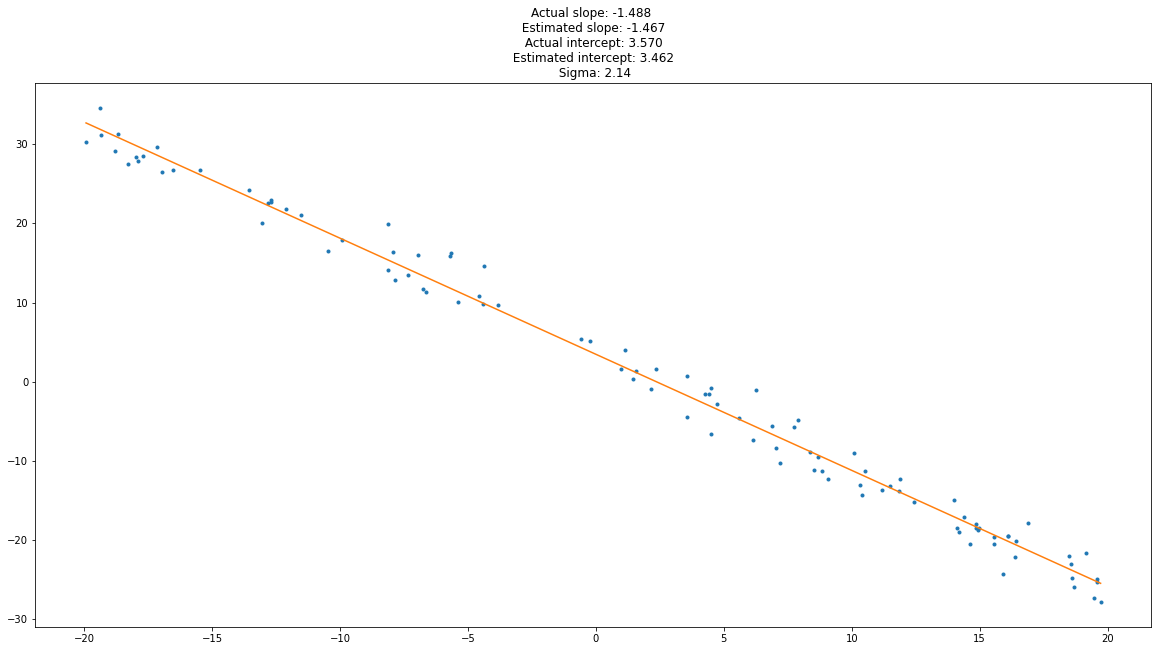

In [56]:
recover_params(10, 5, 20, 5, 100)

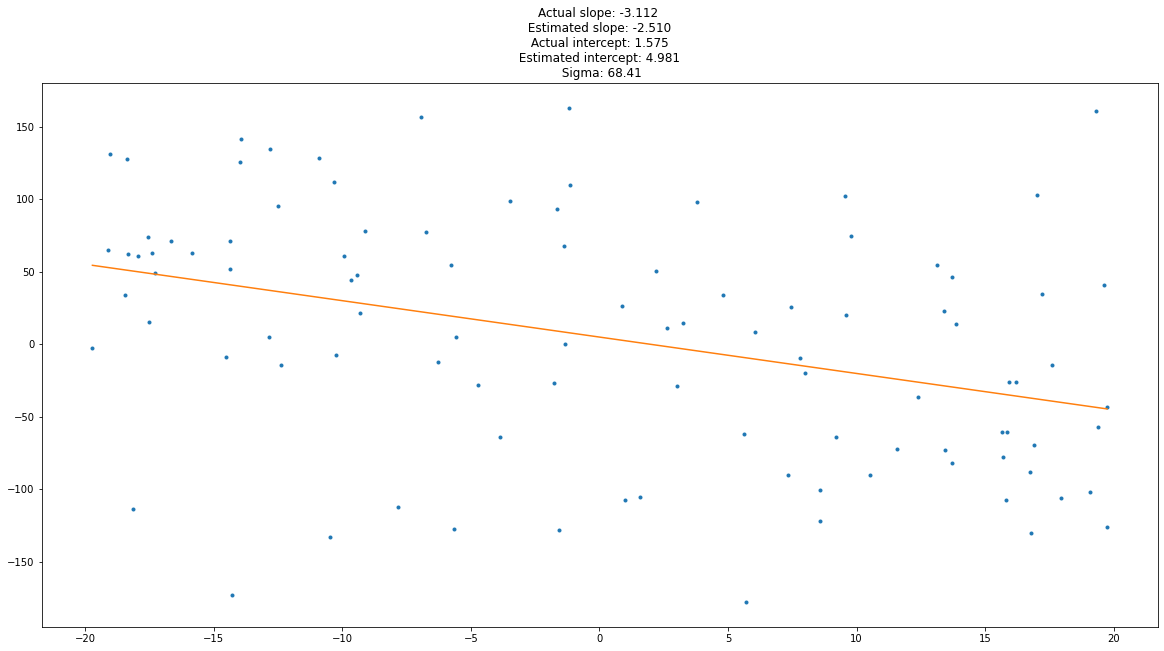

In [57]:
recover_params(10, 5, 20, 100, 100)

## Impact of Non-Constant Variance

So far we've assumed that the variance of the generating distribution was constant across the values of $X$. Though it's outside the scope of our course, the [Gauss-Markov Theorem](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem) demonstrates that this is a condition under which the "least squares" approach to regression delivers the best model.

Constant variance is called *homoskedasticity*, and non-constant variance is called *heteroskedasticity*. Heteroskedasticity is particular a concern in econometrics.

What happens if we relax this assumption, e.g. by making the variance of the generating distribution a linear function of $X$?

In [58]:
def fit_with_heteroskedasticity(slope_range, intercept_range, het_slope, het_intercept, explanatory_range, n):
    slope = np.random.uniform(-slope_range, slope_range)
    intercept = np.random.uniform(-intercept_range, intercept_range)
    
    X = np.sort(np.random.uniform(-explanatory_range, explanatory_range, size=n))
    
    sigma = het_slope * (X - np.min(X)) + het_intercept
    
    Y = np.random.normal(slope * X + intercept, sigma)
    
    b_0, b_1 = polyfit(X, Y, 1)
    
    plt.plot(X, Y, '.')
    plt.plot(X, b_0 + b_1 * X, '-')
    plt.title(f'Actual slope: {slope:.3f} \n Estimated slope: {b_1:.3f} \n Actual intercept: {intercept:.3f} \n Estimated intercept: {b_0:.3f}')
    plt.show()

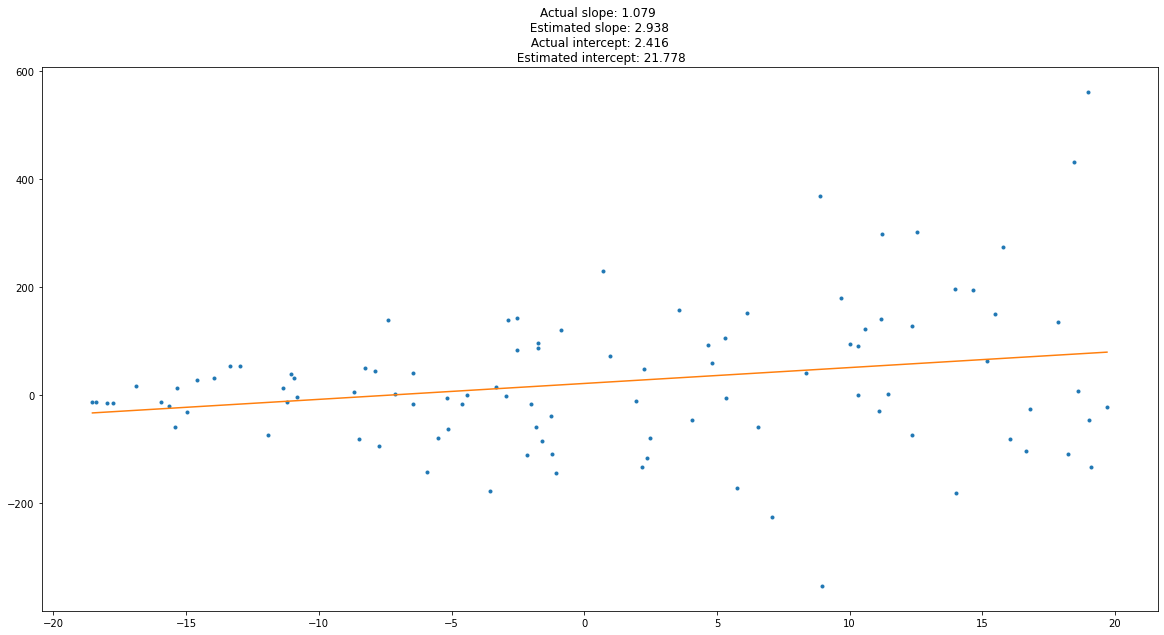

In [59]:
fit_with_heteroskedasticity(10, 5, 5, 7, 20, 100)

## Extracting Multiple Patterns

If multiple signals/patterns are present in the data, linear regression will only extract the linear pattern and leave the others. An easy way to diagnose this situation is to make a residual plot, which will reveal the non-linear pattern and provide hints for further modeling.

In [60]:
def fit_linear_regression_to_quadratic_data(slope_range, intercept_range, order_two_range, explanatory_range, sigma_range, n):
    order_two = np.random.uniform(-order_two_range, order_two_range)
    slope = np.random.uniform(-slope_range, slope_range)
    intercept = np.random.uniform(-intercept_range, intercept_range)
    
    X = np.sort(np.random.uniform(0, explanatory_range, size=n))
    
    sigma = np.random.uniform(0, sigma_range)
    
    Y = np.random.normal(order_two * X**2 + slope * X + intercept, sigma)
    
    b_0, b_1 = polyfit(X, Y, 1)
    
    plt.plot(X, Y, '.')
    plt.plot(X, b_0 + b_1 * X, '-')
    plt.title('Scatterplot with Linear Regression')
    plt.show()
    
    plt.plot(X, Y - (b_0 + b_1 * X), '.')
    plt.title('Residual Plot')
    plt.show()

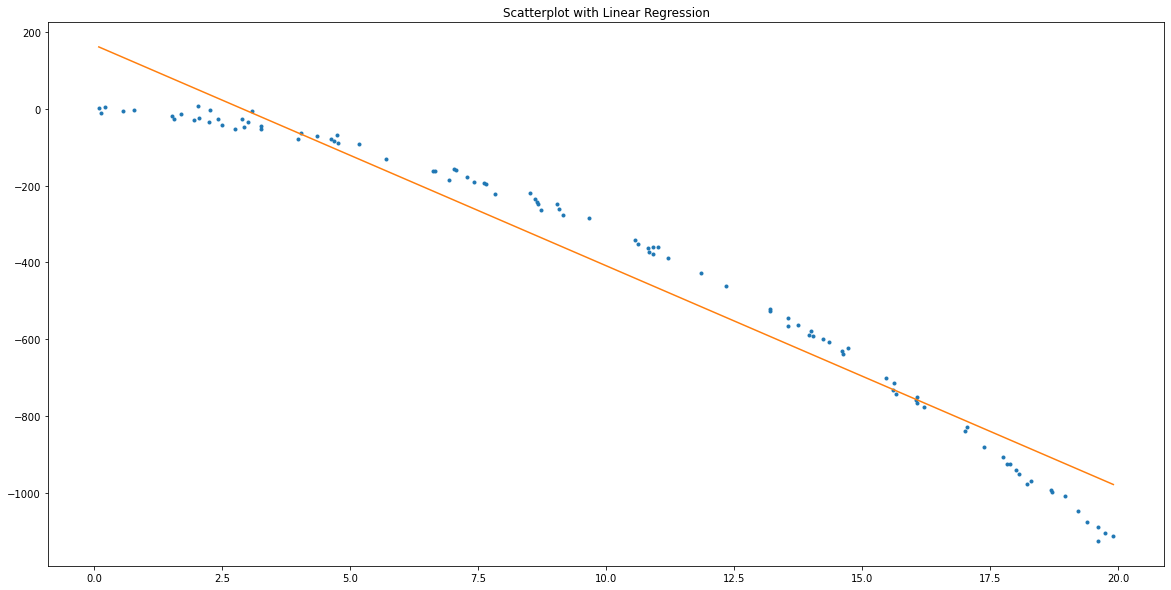

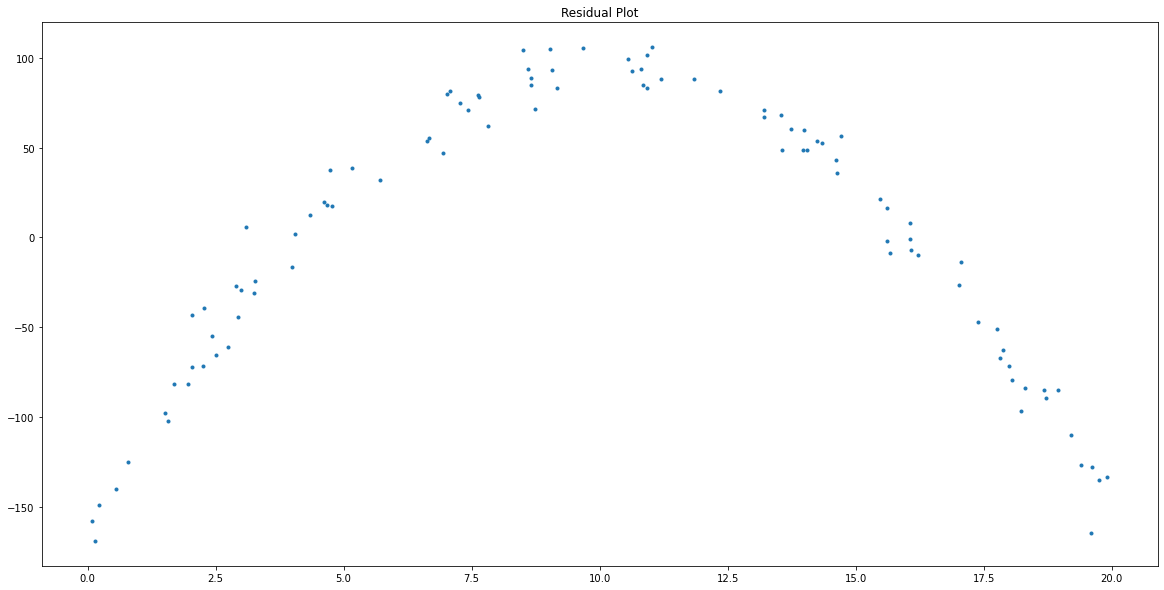

In [61]:
fit_linear_regression_to_quadratic_data(10, 5, 10, 20, 20, 100)

In [62]:
def fit_quadratic_regression_to_quadratic_data(slope_range, intercept_range, order_two_range, explanatory_range, sigma_range, n):
    order_two = np.random.uniform(-order_two_range, order_two_range)
    slope = np.random.uniform(-slope_range, slope_range)
    intercept = np.random.uniform(-intercept_range, intercept_range)
    
    X = np.sort(np.random.uniform(0, explanatory_range, size=n))
    
    sigma = np.random.uniform(0, sigma_range)
    
    Y = np.random.normal(order_two * X**2 + slope * X + intercept, sigma)
    
    b_0, b_1, b_2 = polyfit(X, Y, 2)
    
    Yhat = b_0 + b_1 * X + b_2 * (X**2)
    
    plt.plot(X, Y, '.')
    plt.plot(X, Yhat, '-')
    plt.title('Scatterplot with Quadratic Regression')
    plt.show()
    
    plt.plot(X, Y - (b_0 + b_1 * X + b_2 * X**2), '.')
    plt.title('Residual Plot')
    plt.show()

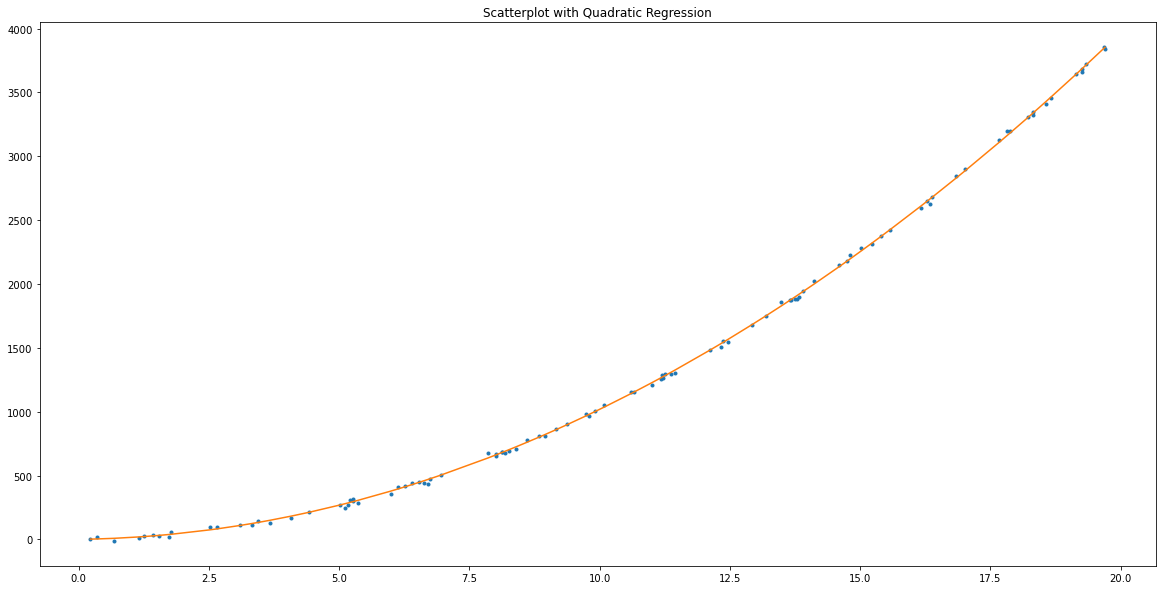

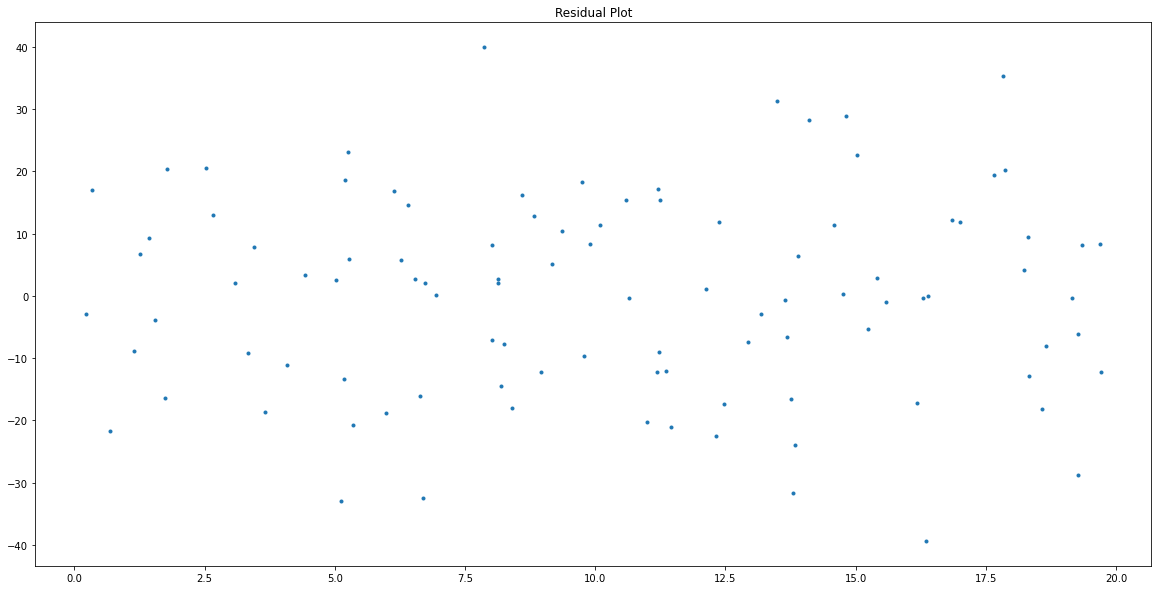

In [63]:
fit_quadratic_regression_to_quadratic_data(10, 5, 10, 20, 20, 100)